# Largest Empty Circle Test Cases

This notebook is an extension of the pytest file used in TDD. It shows the results of the following function(s) in the library

get_largest_empty_circle

In this example we will 
- generate a sample of points following a Possion Disk Distribution (all points are located at a mininum distance from each other)
- generate the Convex Hull and Voronoi diagrams
- search for closest points in the sample to each Voronoi vertex 
- select largest circle and correspoinding Voronoi vertex

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.path as mpltPath
from scipy.stats import qmc
from scipy import spatial
import numpy as np

## Poisson Disk Distribution or Blue Noise
We will select a sample of point in 2D space, that are separated by a minimum distance r. 
Reference: https://www.cs.ubc.ca/~rbridson/docs/bridson-siggraph07-poissondisk.pdf

In [2]:
# poisson disk sampling
# https://docs.scipy.org/doc/scipy-1.9.0/reference/generated/scipy.stats.qmc.PoissonDisk.html
rng = np.random.default_rng()
radius = 0.2
engine = qmc.PoissonDisk(d=2, radius=0.2, seed=rng)
sample = engine.random(20)

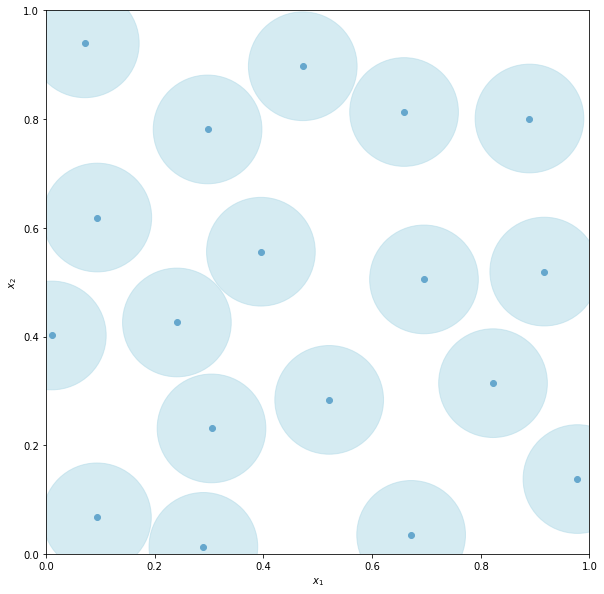

In [3]:
# we can see that each point in the sample is located at least a distance r from each other
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(sample[:, 0], sample[:, 1])
circles = [plt.Circle((xi, yi), radius=radius/2)
           for xi, yi in sample]
collection = PatchCollection(circles, color='lightblue',alpha=0.5)
ax.add_collection(collection)
_ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
           xlim=[0, 1], ylim=[0, 1])
plt.show()

## Convex Hull
Teh convex hull of a set S in R^n is the intersection of all convex sets containing S
https://mathworld.wolfram.com/ConvexHull.html

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
hull = spatial.ConvexHull(sample)

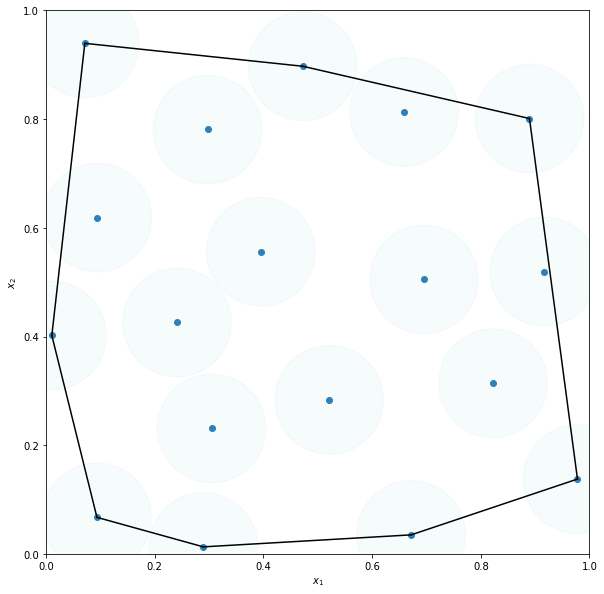

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(sample[:, 0], sample[:, 1])
circles = [plt.Circle((xi, yi), radius=radius/2)
           for xi, yi in sample]
collection = PatchCollection(circles, color='lightblue',alpha=0.1)
ax.add_collection(collection)
_ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
           xlim=[0, 1], ylim=[0, 1])


for simplex in hull.simplices:
    plt.plot(sample[simplex, 0], sample[simplex, 1], 'k-')

plt.show()

## Voronoi Diagrams
As Voronoi diagram is a partition of a plane with n points. Each partition is a convex polygon containing exaclty one point P and each point in the ploygone is closer to that point P than any other generating one. 
https://mathworld.wolfram.com/VoronoiDiagram.html

In [6]:
vor = spatial.Voronoi(sample)

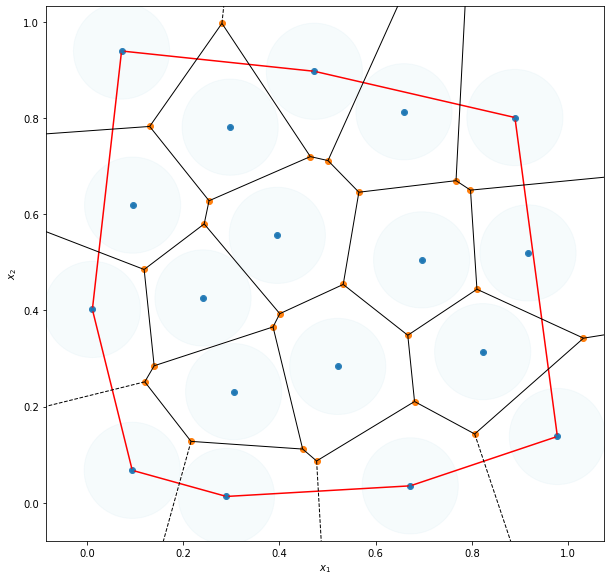

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(sample[:, 0], sample[:, 1])
circles = [plt.Circle((xi, yi), radius=radius/2)
           for xi, yi in sample]
collection = PatchCollection(circles, color='lightblue',alpha=0.1)
ax.add_collection(collection)
_ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
           xlim=[0, 1], ylim=[0, 1])
for simplex in hull.simplices:
    plt.plot(sample[simplex, 0], sample[simplex, 1], 'red')
spatial.voronoi_plot_2d(vor,ax=ax)
plt.show()

In [10]:
# finding vertices inside the convex hull 
polygon = sample[hull.vertices]

CHpath = mpltPath.Path(polygon)
isInside = CHpath.contains_points(vor.vertices)

vor_vertices_CH = vor.vertices[isInside]

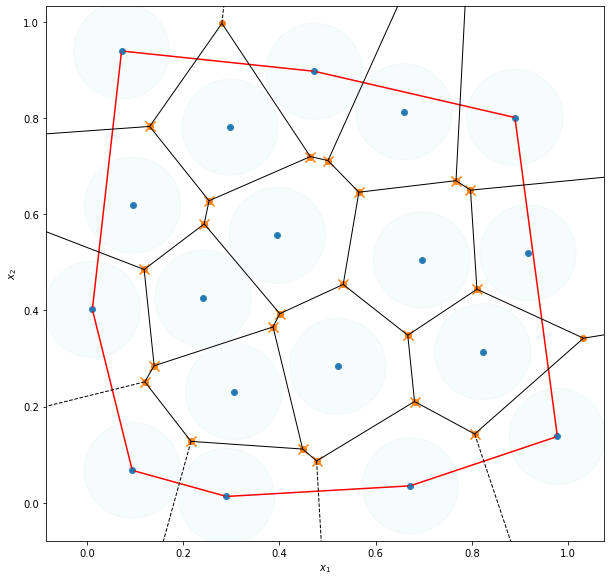

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(sample[:, 0], sample[:, 1])
circles = [plt.Circle((xi, yi), radius=radius/2)
           for xi, yi in sample]
collection = PatchCollection(circles, color='lightblue',alpha=0.1)
ax.add_collection(collection)
_ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
           xlim=[0, 1], ylim=[0, 1])
for simplex in hull.simplices:
    plt.plot(sample[simplex, 0], sample[simplex, 1], 'red')
spatial.voronoi_plot_2d(vor,ax=ax)
plt.scatter(vor_vertices_CH.T[0],vor_vertices_CH.T[1],marker='x',s=100)
plt.show()

## KDTree
A KD tree is a partition of the data as a binary tree where each node represents a point in the sample. It is very helpful to find distance between points and search for nearest neighbors. We will generate the KD tree for the Voronoi vertices and then look for the largest distance to the closest sample point (k=1).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html

In [12]:
tree = spatial.KDTree(sample)
l_distance_sample_vertice, l_index_sample = tree.query(vor_vertices_CH,k=1)

In [13]:
np.max(l_distance_sample_vertice), l_index_sample[np.argmax(l_distance_sample_vertice)],np.arange(len(vor.vertices))[np.argmax(l_distance_sample_vertice)]

(0.20147427059892237, 5, 5)

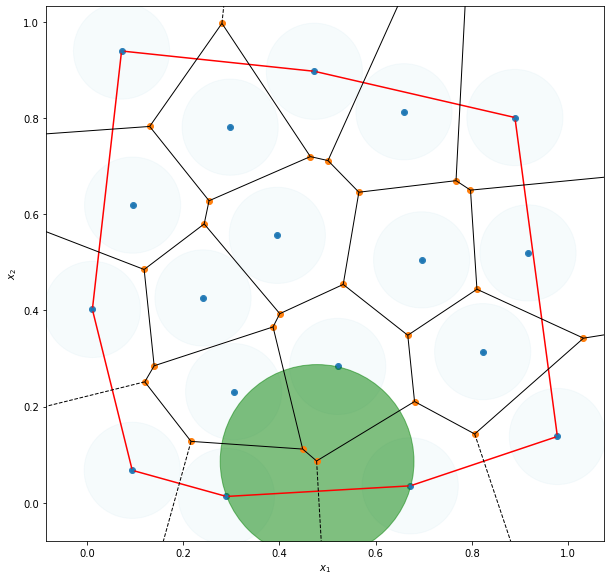

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(sample[:, 0], sample[:, 1])
circles = [plt.Circle((xi, yi), radius=radius/2)
           for xi, yi in sample]
collection = PatchCollection(circles, color='lightblue',alpha=0.1)
ax.add_collection(collection)
_ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
           xlim=[0, 1], ylim=[0, 1])
for simplex in hull.simplices:
    plt.plot(sample[simplex, 0], sample[simplex, 1], 'red')
spatial.voronoi_plot_2d(vor,ax=ax)

LEC = plt.Circle((vor_vertices_CH[np.argmax(l_distance_sample_vertice)]), radius=np.max(l_distance_sample_vertice), fill='green',alpha=0.1)
collectionLEC = PatchCollection([LEC], color='green',alpha=0.5)
ax.add_collection(collectionLEC)


plt.show()

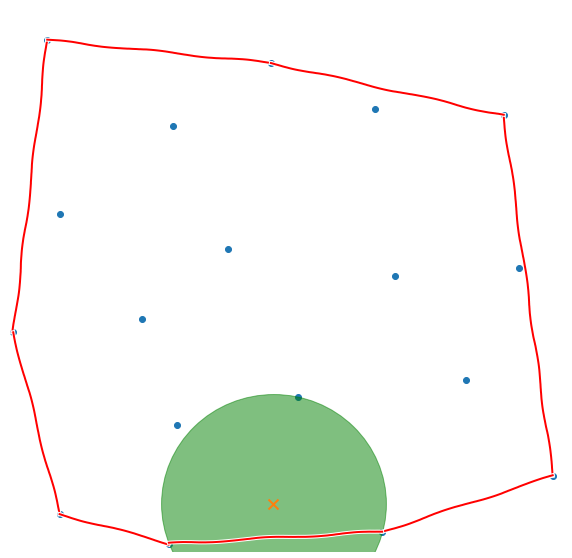

In [26]:
with plt.xkcd():    
    fig, ax = plt.subplots(figsize=(10,10))
    _ = ax.scatter(sample[:, 0], sample[:, 1])
    #circles = [plt.Circle((xi, yi), radius=radius/2)
    #           for xi, yi in sample]
    #collection = PatchCollection(circles, color='lightblue',alpha=0.1)
    #ax.add_collection(collection)
    #_ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
    #           xlim=[0, 1], ylim=[0, 1])
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    plt.axis('off')
    
    for simplex in hull.simplices:
        plt.plot(sample[simplex, 0], sample[simplex, 1], 'red')
    #spatial.voronoi_plot_2d(vor,ax=ax)

    LEC = plt.Circle((vor_vertices_CH[np.argmax(l_distance_sample_vertice)]), radius=np.max(l_distance_sample_vertice), fill='green',alpha=0.1)
    collectionLEC = PatchCollection([LEC], color='green',alpha=0.5)
    ax.add_collection(collectionLEC)
    
    plt.scatter(vor_vertices_CH[np.argmax(l_distance_sample_vertice)][0],vor_vertices_CH[np.argmax(l_distance_sample_vertice)][1],marker='x',s=100)

    plt.savefig('LEC_xkcd.png')

    plt.show()

In [15]:
def get_largest_empty_circle(sample,generate_plots=False):
    # finding Convex Hull
    hull = spatial.ConvexHull(sample)
    
    # finding Voronoi cells
    vor = spatial.Voronoi(sample)
    
    # finding vertices inside the convex hull 
    polygon = sample[hull.vertices]

    CHpath = mpltPath.Path(polygon)
    isInside = CHpath.contains_points(vor.vertices)

    vor_vertices_CH = vor.vertices[isInside]
    
    # finding KDtree and distances from vertices inside the convex hull and the sample data
    tree = spatial.KDTree(sample)
    l_distance_sample_vertice, l_index_sample = tree.query(vor_vertices_CH,k=1)
    
    if generate_plots == True:
        
        fig, ax = plt.subplots(figsize=(10,10))
        _ = ax.scatter(sample[:, 0], sample[:, 1])
        
        _ = ax.set(aspect='equal', xlabel=r'$x_1$', ylabel=r'$x_2$',
                   xlim=[0, 1], ylim=[0, 1])
        for simplex in hull.simplices:
            plt.plot(sample[simplex, 0], sample[simplex, 1], 'red')
        spatial.voronoi_plot_2d(vor,ax=ax)

        LEC = plt.Circle((vor_vertices_CH[np.argmax(l_distance_sample_vertice)]), radius=np.max(l_distance_sample_vertice), fill='green',alpha=0.1)
        collectionLEC = PatchCollection([LEC], color='green',alpha=0.5)
        ax.add_collection(collectionLEC)

        plt.savefig('LEC.png')
        plt.show()
        
    
    return(vor_vertices_CH[np.argmax(l_distance_sample_vertice)],np.max(l_distance_sample_vertice))

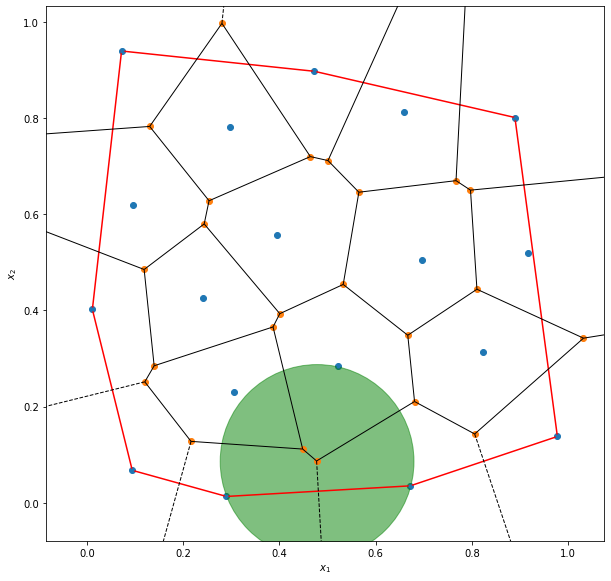

(array([0.47721712, 0.08691512]), 0.20147427059892237)

In [16]:
get_largest_empty_circle(sample,generate_plots=True)